**Machine specs:**

Intel Core i5-9400F

6 cores, 6 threads

L1 cache: 64 KB (per core)

L2 cache : 256 KB (per core)

L3 cache: 9 MB

In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
def plot_dicts(d, legend_title, title="", xlabel="", ylabel="", div=1e3, x=[]):
    plt.rcParams["figure.figsize"] = [7.5, 5]
    if x == []:
        keys = d.keys()
        for key in keys:
            plt.plot(d[key].keys(), list(map(lambda mcs: mcs / div, d[key].values())), label=key)
    else:
        keys = d.keys()
        for key in keys:
            dp = {k: d[key][k] for k in x}
            plt.plot(dp.keys(), list(map(lambda mcs: mcs / div, dp.values())), label=key)
    legend = plt.legend()
    legend.set_title(legend_title) 
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(ymin=0)
    plt.show()

In [3]:
def refactor_dict(d):
    m = max(map(int, d.keys()))
    return { 'N' if int(k) == m else k: d[k] for k in d.keys() }

def refactor(d):
    return { k: refactor_dict(d[k]) for k in d.keys() }

In [4]:
out = open(r'intel.txt', 'r')
lines = out.readlines()
all_durations = json.loads(lines[0].strip())

durations_small = refactor({k: all_durations[k] for k in ['500', '400', '300', '200', '100']})
durations_big = refactor({k: all_durations[k] for k in ['2000', '1000']})
durations_power_of_two = refactor({k: all_durations[k] for k in ['1023', '1024', '1025']})

## Tile algorithms for N: 100, 200, 300, 400, 500

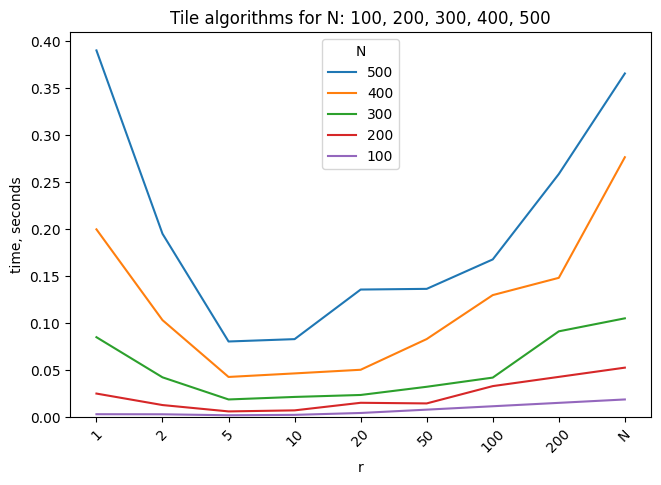

In [5]:
plot_dicts(durations_small, 'N', 'Tile algorithms for N: 100, 200, 300, 400, 500', 'r', 'time, seconds')

## Tile algorithms for N: 1000, 2000

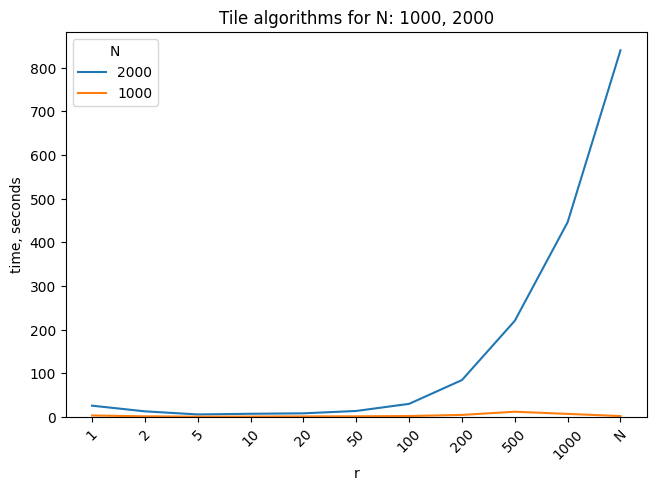

In [6]:
plot_dicts(durations_big, 'N', 'Tile algorithms for N: 1000, 2000', 'r', 'time, seconds')

## Algorithm behaviour near N = $2^{10}$

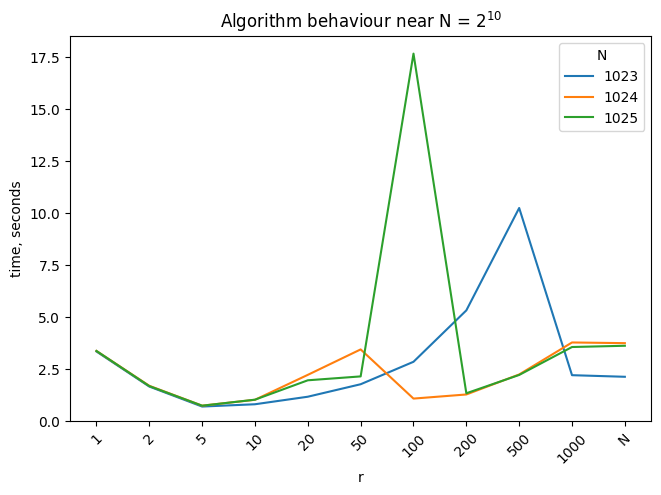

In [7]:
plot_dicts(durations_power_of_two, 'N', 'Algorithm behaviour near N = $2^{10}$', 'r', 'time, seconds')